In [1]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
import dtw
import base as bs

In [2]:
jogging = pd.read_csv("../dataset_processing/jogging_ready.csv", index_col="Unnamed: 0")
walking = pd.read_csv("../dataset_processing/walking_ready.csv", index_col="Unnamed: 0")

jogging.columns = jogging.columns.astype(int)
walking.columns = walking.columns.astype(int)

In [3]:
sample_n = 52

param_dtw = {"model_s": bs.StaticFunc.norm_transform(np.mean(walking)), # np.mean(walking), #  
            "class_s": walking.iloc[sample_n, :], # walking.iloc[sample_n, :], #  
            "start_l": 0,
            "end_l": 36}

In [10]:
dtw_setp = bs.DtwStep(**param_dtw)("linear")

[0.01477983 1.06700409]


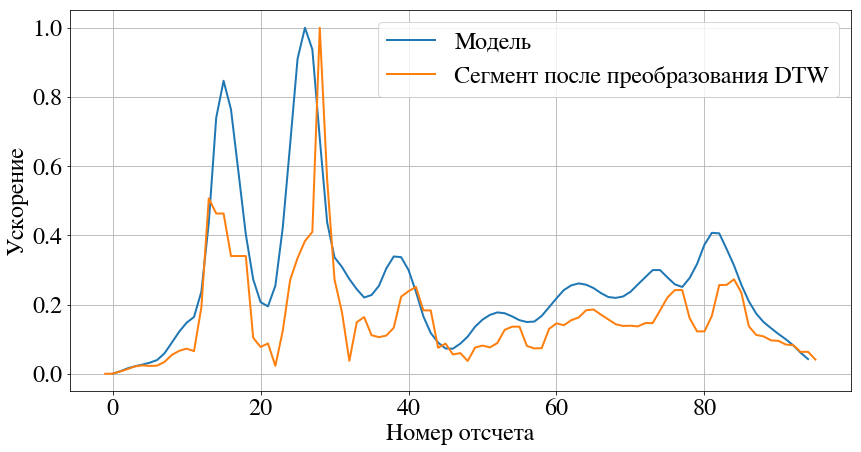

In [6]:
plt.figure(figsize=(14, 7))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

plt.grid()
plt.plot(param_dtw["model_s"])
# plt.plot(param_dtw["class_s"], "--")
plt.plot(dtw_setp)
plt.legend(["Модель", "Сегмент после преобразования DTW"]) #  "Current activity"
plt.xlabel("Номер отсчета")
plt.ylabel("Ускорение")
plt.savefig("pictures/sample_n__{}__start_l__{}__end_l__{}__dtw_step.png".format(sample_n, param_dtw["start_l"], param_dtw["end_l"]),
            bbox_inches = "tight", format="png")
plt.show()

In [7]:
param_semor = {"model_s": param_dtw["model_s"],
              "class_s": dtw_setp}

In [8]:
semor_step, rss_step  = bs.semor_step(**param_semor)
print(rss_step)

[0.        1.0838781]
2.359815854417909


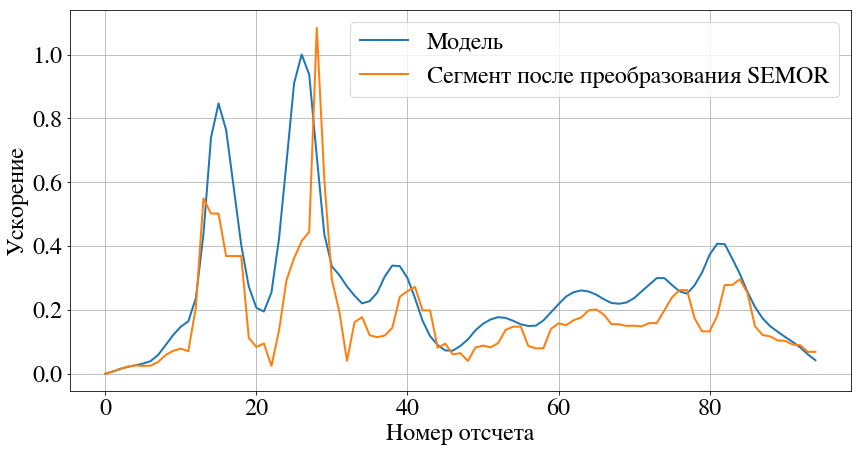

In [9]:
plt.figure(figsize=(14, 7))

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.grid()

plt.plot(param_dtw["model_s"])
# plt.plot(param_dtw["class_s"], "--", lw=3)
# plt.plot(bs.norm_transform(param_dtw["model_s"]), lw=3)
# plt.plot(bs.norm_transform(param_dtw["class_s"]), "--", lw=3)
plt.plot(semor_step)

plt.legend(["Модель", "Сегмент после преобразования SEMOR"]) # "Current activity",

plt.xlabel("Номер отсчета")
plt.ylabel("Ускорение")

plt.savefig("./pictures/sample_n__{}__start_l__{}__end_l__{}__semor_step.png".format(sample_n, param_dtw["start_l"], param_dtw["end_l"]),
            bbox_inches = "tight", format="png")
plt.show()